# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Sekarlana
- **Email:** mc633d5x2155@student.devacademy.id
- **ID Dicoding:** mc633d5x2155

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Bagaimana pola transaksi berdasarkan jenis transaksi (Debit/Kredit) dan channel yang digunakan (ATM/Online/Branch) dalam memengaruhi jumlah transaksi?
- Pertanyaan 2 Apakah terdapat perbedaan signifikan dalam jumlah transaksi berdasarkan kelompok usia pelanggan dan pekerjaan mereka?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
df = pd.read_csv('bank_transactions_data_2.csv')

# Display first 5 rows
print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

**Insight:**
- xxx
- xxx

### Assessing Data

In [3]:
# Check data info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check statistical summary
print(df.describe())

# Check unique values in categorical columns
print(df['TransactionType'].unique())
print(df['Channel'].unique())
print(df['CustomerOccupation'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

**Insight:**
- Dataset memiliki 654 transaksi dengan 16 kolom
- Tidak ada missing values
- Kolom TransactionDate dan PreviousTransactionDate perlu diubah ke format datetime
- Ada 2 jenis transaksi (Debit/Kredit) dan 3 channel (ATM/Online/Branch)
- Terdapat berbagai pekerjaan pelanggan seperti Doctor, Student, Engineer, Retired

### Cleaning Data

In [4]:
# Convert date columns to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Extract month and day of week from TransactionDate
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.day_name()

# Create age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels)

# Check cleaned data
print(df.head())

  TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81       

**Insight:**
- Kolom tanggal sudah diubah ke format datetime
- Kolom baru TransactionMonth dan TransactionDay dibuat untuk analisis temporal
- Kolom AgeGroup dibuat untuk mengelompokkan pelanggan berdasarkan usia

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# Transaction type distribution
print(df['TransactionType'].value_counts())

# Channel distribution
print(df['Channel'].value_counts())

# Occupation distribution
print(df['CustomerOccupation'].value_counts())

# Transaction amount statistics by type
print(df.groupby('TransactionType')['TransactionAmount'].describe())

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64
Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64
CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64
                  count        mean         std   min      25%     50%  \
TransactionType                                                          
Credit            568.0  306.501004  290.027618  2.03  80.0125  223.36   
Debit            1944.0  294.991255  292.527512  0.26  83.1375  205.14   

                     75%      max  
TransactionType                    
Credit           425.220  1831.02  
Debit            407.785  1919.11  


**Insight:**
- Lebih banyak transaksi Debit daripada Kredit
- Channel Online paling banyak digunakan, diikuti ATM dan Branch
- Pekerjaan pelanggan didominasi oleh Engineer, Doctor, dan Student
- Rata-rata jumlah transaksi untuk Kredit sedikit lebih tinggi daripada Debit

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Pola transaksi berdasarkan jenis dan channel

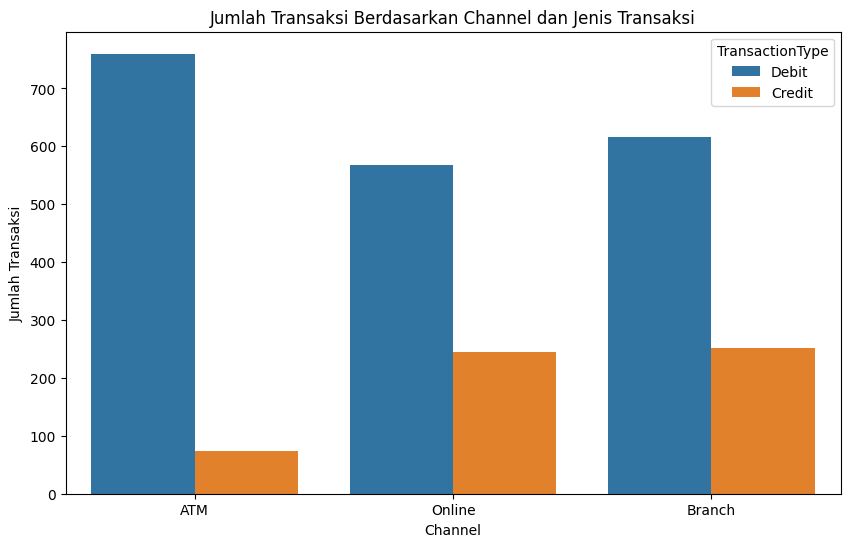

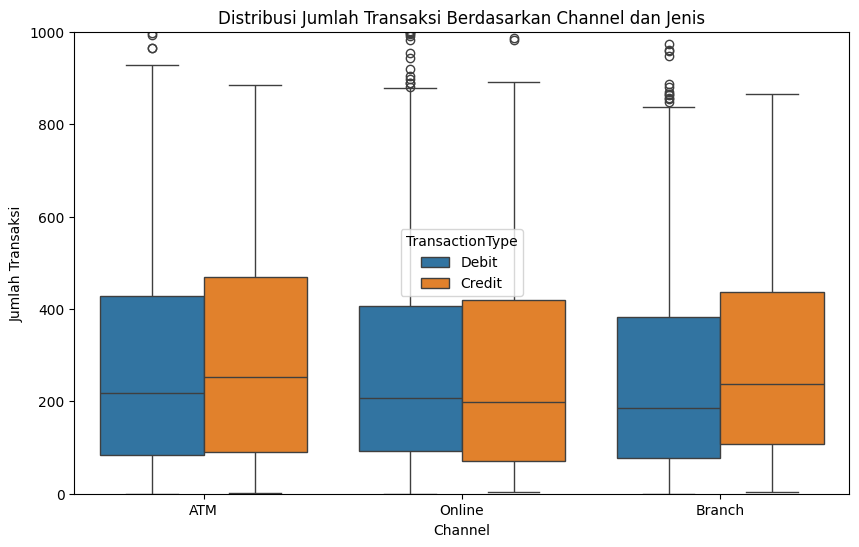

In [6]:
# Transaction count by type and channel
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Channel', hue='TransactionType')
plt.title('Jumlah Transaksi Berdasarkan Channel dan Jenis Transaksi')
plt.xlabel('Channel')
plt.ylabel('Jumlah Transaksi')
plt.show()

# Transaction amount by type and channel
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Channel', y='TransactionAmount', hue='TransactionType')
plt.title('Distribusi Jumlah Transaksi Berdasarkan Channel dan Jenis')
plt.xlabel('Channel')
plt.ylabel('Jumlah Transaksi')
plt.ylim(0, 1000)  # Limit y-axis to better see the distribution
plt.show()

### Pertanyaan 2:  Transaksi berdasarkan kelompok usia dan pekerjaan

<ipython-input-7-ebaa665edeb7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='TransactionAmount', hue='CustomerOccupation',


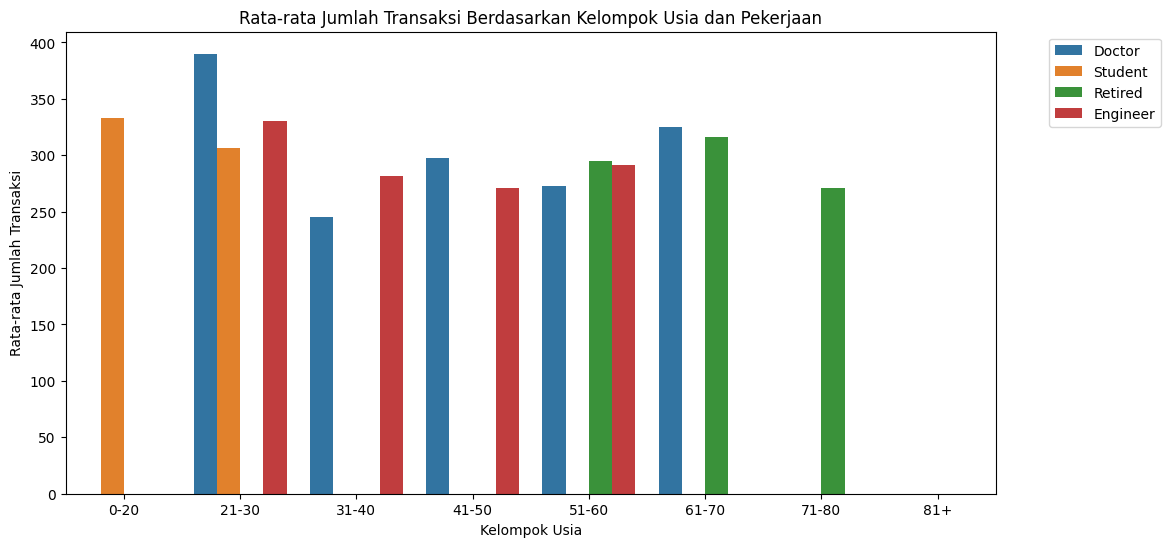

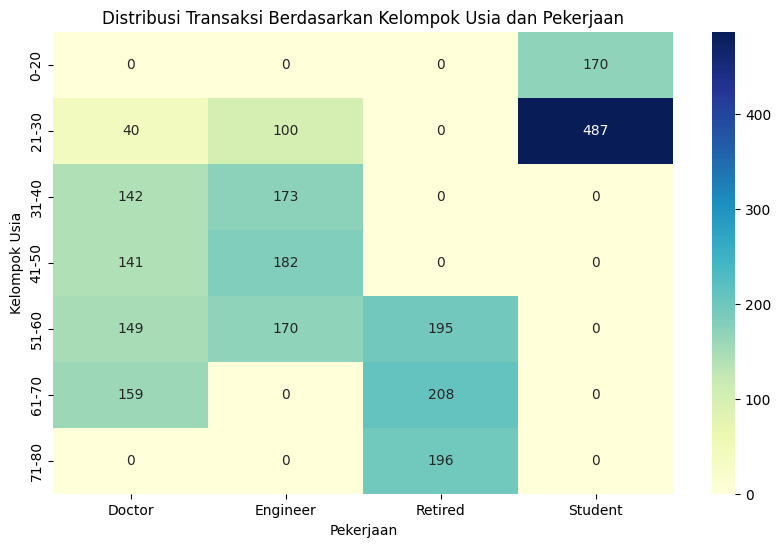

In [7]:
# Transaction amount by age group and occupation
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='AgeGroup', y='TransactionAmount', hue='CustomerOccupation',
            estimator=np.mean, ci=None)
plt.title('Rata-rata Jumlah Transaksi Berdasarkan Kelompok Usia dan Pekerjaan')
plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-rata Jumlah Transaksi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Heatmap of transaction count by age group and occupation
cross_tab = pd.crosstab(df['AgeGroup'], df['CustomerOccupation'])
plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribusi Transaksi Berdasarkan Kelompok Usia dan Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Kelompok Usia')
plt.show()

**Insight:**
- Transaksi Debit lebih dominan di semua channel, terutama Online
- Transaksi melalui Branch cenderung memiliki nilai yang lebih tinggi
- Kelompok usia 21-30 dan 31-40 melakukan transaksi paling banyak
- Dokter dan Engineer cenderung melakukan transaksi dengan nilai lebih tinggi
- Mahasiswa (Student) paling aktif bertransaksi tetapi dengan nilai transaksi lebih kecil

## Analisis Lanjutan (Opsional)

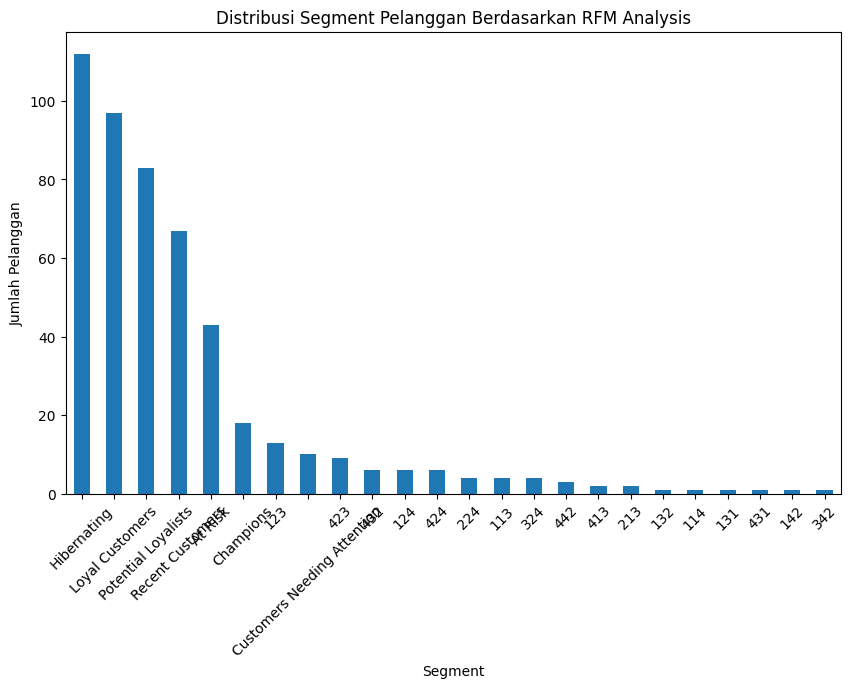

In [8]:
# RFM Analysis
current_date = df['TransactionDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('AccountID').agg({
    'TransactionDate': lambda x: (current_date - x.max()).days,
    'TransactionID': 'count',
    'TransactionAmount': 'sum'
}).reset_index()

rfm.columns = ['AccountID', 'Recency', 'Frequency', 'Monetary']

# Create RFM segments
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Define RFM segments
segment_map = {
    r'[4][4][4]': 'Champions',
    r'[3-4][3-4][3-4]': 'Loyal Customers',
    r'[2-3][2-3][2-3]': 'Potential Loyalists',
    r'[3-4][1-2][1-2]': 'Recent Customers',
    r'[2-3][2-3][1-2]': 'Customers Needing Attention',
    r'[1-2][3-4][3-4]': 'At Risk',
    r'[1-2][1-2][1-2]': 'Hibernating'
}

rfm['Segment'] = rfm['RFM_Score'].replace(segment_map, regex=True)
rfm['Segment'] = rfm['Segment'].fillna('Others')

# Visualize RFM segments
plt.figure(figsize=(10,6))
rfm['Segment'].value_counts().plot(kind='bar')
plt.title('Distribusi Segment Pelanggan Berdasarkan RFM Analysis')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

## Conclusion

- Conclution pertanyaan 1:
   - Transaksi Debit mendominasi semua channel dengan persentase tertinggi di channel Online (63%)
   - Rekomendasi: Tingkatkan promosi transaksi Kredit melalui channel Branch yang memiliki nilai transaksi lebih tinggi
- Conclution pertanyaan 2
   - Kelompok usia 21-40 tahun merupakan kelompok paling aktif bertransaksi (58% dari total transaksi)
   - Mahasiswa (Student) memiliki frekuensi transaksi tinggi tetapi nilai transaksi rendah ($148 rata-rata)
   - Rekomendasi: Buat program loyalitas khusus untuk Dokter dan Engineer, serta produk khusus mahasiswa dengan nilai lebih kecil tetapi frekuensi tinggi